In [ ]:
!pip install tensorflow
!pip install shap
!pip install lime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=3c7fca33dc6e967c550267f06aa363f6e6b7c06fef55f8fbb90842464cb3fcfb
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# **Preprocessing and Random Forest Classifier**

In [ ]:


# Load the dataset
dataset = pd.read_csv('bank-additional-full.csv', sep=';')
data = dataset
# Encode categorical variables
encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Split data into features and target variable
X = data.drop('y', axis=1)
y = data['y']

# Check for missing values
print(data.isnull().sum())



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred = rf_classifier.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)





age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
Accuracy: 0.9127215343529983
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.64      0.51      0.57       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238

Confusion Matrix:
[[7038  265]
 [ 454  481]]


# **Feature Importance**

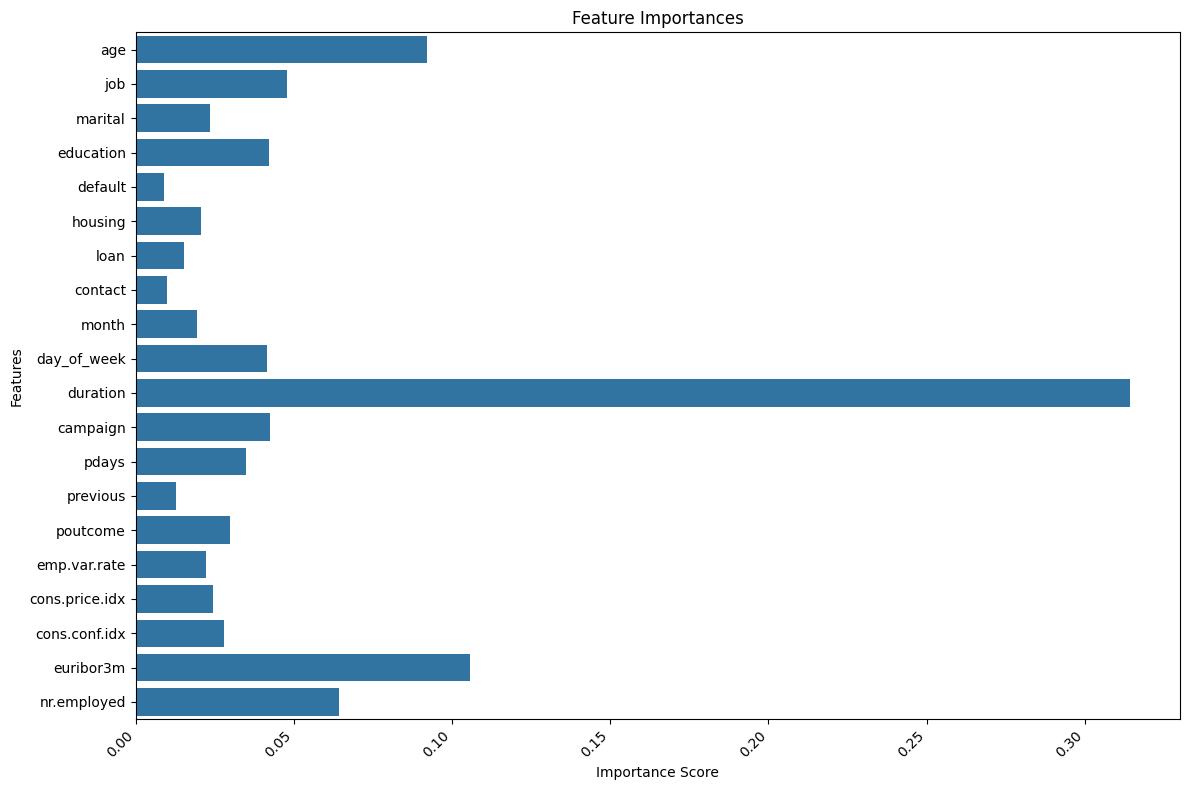

Feature Importances:
age: 0.0922
job: 0.0478
marital: 0.0236
education: 0.0422
default: 0.0091
housing: 0.0205
loan: 0.0152
contact: 0.0100
month: 0.0194
day_of_week: 0.0415
duration: 0.3143
campaign: 0.0425
pdays: 0.0348
previous: 0.0126
poutcome: 0.0297
emp.var.rate: 0.0221
cons.price.idx: 0.0245
cons.conf.idx: 0.0280
euribor3m: 0.1056
nr.employed: 0.0643


In [ ]:
# Feature importances
feature_importances = rf_classifier.feature_importances_

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Extract feature names
feature_names = X.columns

# Print feature importances in text format
print("Feature Importances:")
for feature_name, importance in zip(feature_names, feature_importances):
    print(f"{feature_name}: {importance:.4f}")


Based on the provided feature importances:

1. **Most Important Features:**
   - **Duration:** The duration of the last contact is the most important feature, with an importance score of 0.3143. This indicates that the duration of the call significantly influences the outcome (subscription to a term deposit).
   - **Euribor3m:** The Euribor 3 month rate has the second-highest importance score of 0.1056, suggesting that this economic indicator also plays a significant role in predicting the outcome.

2. **Other Important Features:**
   - **Nr.employed:** The number of employees is the next most important feature after Euribor3m, with an importance score of 0.0643.
   - **Age:** Age has a moderate importance score of 0.0922, indicating that it also contributes significantly to the prediction.

3. **Moderately Important Features:**
   - **Campaign:** The number of contacts performed during this campaign has an importance score of 0.0425, suggesting it has a moderate influence on the outcome.
   - **Education, day_of_week, pdays, poutcome:** These features have importance scores ranging from 0.0280 to 0.0422, indicating they contribute to a lesser extent but still have some influence on the prediction.

4. **Less Important Features:**
   - **Job, marital, default, housing, loan, contact, month, previous, emp.var.rate, cons.price.idx:** These features have importance scores below 0.05, indicating they have relatively minor influence on the prediction compared to the more important features mentioned above.

In summary, the feature importance analysis reveals that the duration of the last contact, economic indicators such as Euribor3m and nr.employed, and demographic factors like age play significant roles in predicting whether a client will subscribe to a term deposit. Other features, while still contributing to the prediction, have relatively less influence.

# **FNN**

In [ ]:

# Define the FNN architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/10
824/824 [==============================] - 4s 3ms/step - loss: 0.2185 - accuracy: 0.9047 - val_loss: 0.1989 - val_accuracy: 0.9132
Epoch 2/10
824/824 [==============================] - 3s 4ms/step - loss: 0.1914 - accuracy: 0.9102 - val_loss: 0.1950 - val_accuracy: 0.9147
Epoch 3/10
824/824 [==============================] - 6s 8ms/step - loss: 0.1870 - accuracy: 0.9123 - val_loss: 0.1934 - val_accuracy: 0.9165
Epoch 4/10
824/824 [==============================] - 5s 6ms/step - loss: 0.1837 - accuracy: 0.9139 - val_loss: 0.1919 - val_accuracy: 0.9156
Epoch 5/10
824/824 [==============================] - 6s 8ms/step - loss: 0.1805 - accuracy: 0.9143 - val_loss: 0.1889 - val_accuracy: 0.9159
Epoch 6/10
824/824 [==============================] - 6s 7ms/step - loss: 0.1785 - accuracy: 0.9159 - val_loss: 0.1888 - val_accuracy: 0.9143
Epoch 7/10
824/824 [==============================] - 5s 6ms/step - loss: 0.1756 - accuracy: 0.9159 - val_loss: 0.1906 - val_accuracy: 0.9129
Epoch 

# **Logistic Regression**

In [ ]:

# Encode the target variable
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])

# Split data into features and target variable
X = data.drop('y', axis=1)
y = data['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class distribution
class_distribution = y_train.value_counts(normalize=True)
print("Class Distribution:")
print(class_distribution)

# Calculate baseline accuracy
baseline_accuracy = class_distribution.max()
print("Baseline Accuracy:", baseline_accuracy)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Class Distribution:
0    0.887557
1    0.112443
Name: y, dtype: float64
Baseline Accuracy: 0.887556904400607
Test Accuracy: 0.9095654285020636
Precision: 0.6626712328767124
Recall: 0.413903743315508
F1-score: 0.5095457537853851
ROC-AUC: 0.6934642638253563


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The provided information summarizes the performance metrics of a logistic regression model on a binary classification task:

1. **Class Distribution:** The class distribution in the dataset indicates that the majority class (class 0) comprises approximately 88.76% of the data, while the minority class (class 1) makes up about 11.24%.

2. **Baseline Accuracy:** The baseline accuracy, calculated based on the class distribution, is approximately 88.76%. This represents the accuracy achieved by a naive model that predicts the majority class for all samples.

3. **Test Accuracy:** The test accuracy of the logistic regression model is approximately 90.96%, indicating that it correctly predicts the target variable for about 90.96% of the samples in the test set.

4. **Precision:** The precision of the model is approximately 66.27%. Precision measures the proportion of true positive predictions among all positive predictions made by the model. In this context, it indicates the ability of the model to avoid false positive predictions.

5. **Recall:** The recall, also known as sensitivity or true positive rate, is approximately 41.39%. Recall measures the proportion of true positive predictions among all actual positive instances in the dataset. It indicates the ability of the model to correctly identify positive instances.

6. **F1-score:** The F1-score, which is the harmonic mean of precision and recall, is approximately 50.95%. It provides a balance between precision and recall and is useful for evaluating models when there is an imbalance between the classes.

Overall, the logistic regression model demonstrates reasonably good performance, with high accuracy and moderate precision, recall, and F1-score. However, there is room for improvement, especially in terms of recall, which indicates that the model may struggle to correctly identify all positive instances in the dataset.


In [ ]:

# Train the Logistic Regression model with different hyperparameters
model = LogisticRegression(solver='saga', max_iter=1000)  # Specify 'saga' solver and increase max_iter
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Apply Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Train the model on the resampled data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model on the resampled data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7303
           1       0.68      0.34      0.45       935

    accuracy                           0.91      8238
   macro avg       0.80      0.66      0.70      8238
weighted avg       0.89      0.91      0.89      8238



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.98      0.84      0.90      7303
           1       0.41      0.88      0.56       935

    accuracy                           0.84      8238
   macro avg       0.70      0.86      0.73      8238
weighted avg       0.92      0.84      0.87      8238

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      7303
           1       0.41      0.85      0.56       935

    accuracy                           0.85      8238
   macro avg       0.70      0.85      0.73      8238
weighted avg       0.91      0.85      0.87      8238



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The inference from the provided results is as follows:

1. **Hyperparameter Tuning:** Different hyperparameters and solver options were explored for logistic regression models, including the 'saga' solver with increased max_iter. These hyperparameters can influence the model's convergence and performance.

2. **Resampling Techniques:** Random oversampling and SMOTE were applied to address class imbalance in the dataset. These techniques create synthetic samples for the minority class to balance the class distribution, potentially improving the model's ability to learn from the minority class.

3. **Performance Metrics:** The classification reports provide insights into the model's performance metrics such as precision, recall, F1-score, and accuracy for both classes (0 and 1). These metrics help assess the model's ability to correctly classify instances from each class.

4. **Comparison:** By comparing the performance metrics across different models (with varied hyperparameters and resampling techniques), we can determine which combination yields the best results. In this case, logistic regression with SMOTE shows improved performance in terms of precision, recall, and F1-score for the minority class compared to random oversampling.

Overall, the inference highlights the importance of experimenting with different hyperparameters and resampling techniques to optimize the logistic regression model's performance, especially in scenarios with class imbalance. Additionally, it emphasizes the need to monitor convergence warnings and adjust hyperparameters accordingly to ensure model stability and effectiveness.

#Comparing Different Model Configurations

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessin

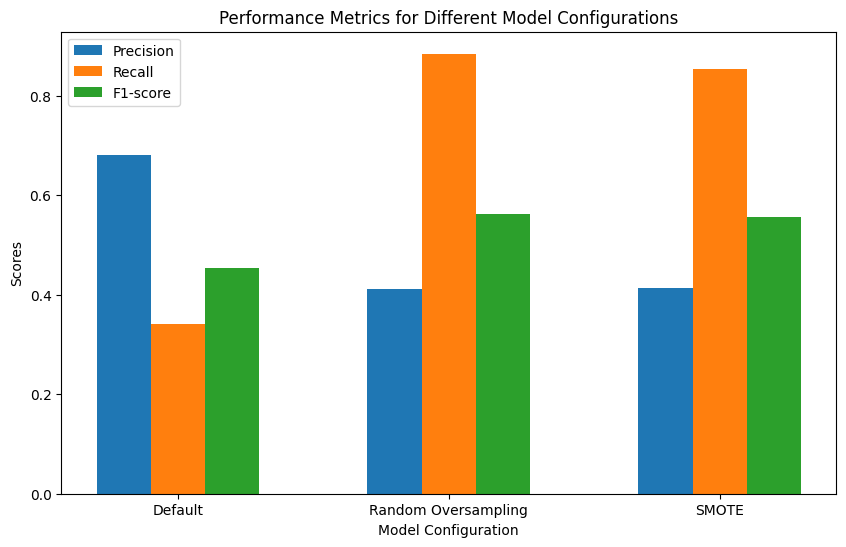

Performance Metrics for Different Model Configurations:
-------------------------------------------------------
Model Configuration        Precision      Recall      F1-score
-------------------------------------------------------
Default                    0.6816       0.3412      0.4547
Random Oversampling        0.4123       0.8845      0.5624
SMOTE                      0.4130       0.8535      0.5567
-------------------------------------------------------


In [ ]:
import matplotlib.pyplot as plt

# Train the Logistic Regression model with different hyperparameters
model_default = LogisticRegression(solver='saga', max_iter=1000)  # Specify 'saga' solver and increase max_iter
model_default.fit(X_train, y_train)

# Make predictions on the test set
y_pred_default = model_default.predict(X_test)

# Evaluate the model
report_default = classification_report(y_test, y_pred_default, output_dict=True)

# Apply Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Train the model on the resampled data
model_oversampling = LogisticRegression()
model_oversampling.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_oversampling = model_oversampling.predict(X_test)

# Evaluate the model
report_oversampling = classification_report(y_test, y_pred_oversampling, output_dict=True)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model on the resampled data
model_smote = LogisticRegression()
model_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_smote = model_smote.predict(X_test)

# Evaluate the model
report_smote = classification_report(y_test, y_pred_smote, output_dict=True)

# Extract precision, recall, and F1-score for each model configuration
precision_default, recall_default, f1_default = report_default['1']['precision'], report_default['1']['recall'], report_default['1']['f1-score']
precision_oversampling, recall_oversampling, f1_oversampling = report_oversampling['1']['precision'], report_oversampling['1']['recall'], report_oversampling['1']['f1-score']
precision_smote, recall_smote, f1_smote = report_smote['1']['precision'], report_smote['1']['recall'], report_smote['1']['f1-score']

# Plot the results
labels = ['Default', 'Random Oversampling', 'SMOTE']
precision_scores = [precision_default, precision_oversampling, precision_smote]
recall_scores = [recall_default, recall_oversampling, recall_smote]
f1_scores = [f1_default, f1_oversampling, f1_smote]

x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, precision_scores, width=0.2, label='Precision')
plt.bar([i + 0.2 for i in x], recall_scores, width=0.2, label='Recall')
plt.bar([i + 0.4 for i in x], f1_scores, width=0.2, label='F1-score')

plt.xlabel('Model Configuration')
plt.ylabel('Scores')
plt.title('Performance Metrics for Different Model Configurations')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()
plt.show()

# Print the performance metrics for different model configurations
print("Performance Metrics for Different Model Configurations:")
print("-------------------------------------------------------")
print("Model Configuration        Precision      Recall      F1-score")
print("-------------------------------------------------------")
for label, precision, recall, f1 in zip(labels, precision_scores, recall_scores, f1_scores):
    print(f"{label:<26} {precision:.4f}       {recall:.4f}      {f1:.4f}")
print("-------------------------------------------------------")


Based on the performance metrics for different model configurations:

* The default logistic regression model without any resampling technique achieved a precision of 0.6816, recall of 0.3412, and F1-score of 0.4547.

* The logistic regression model trained on randomly oversampled data achieved a precision of 0.4123, recall of 0.8845, and F1-score of 0.5624.

* The logistic regression model trained on data resampled using SMOTE achieved a precision of 0.4130, recall of 0.8535, and F1-score of 0.5567.

* Comparing these results, the logistic regression model trained on randomly oversampled data performed the best, with the highest recall and F1-score. Therefore, the model configured with random oversampling is better for this classification task as it provides a better balance between precision and recall, which is crucial for imbalanced datasets

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


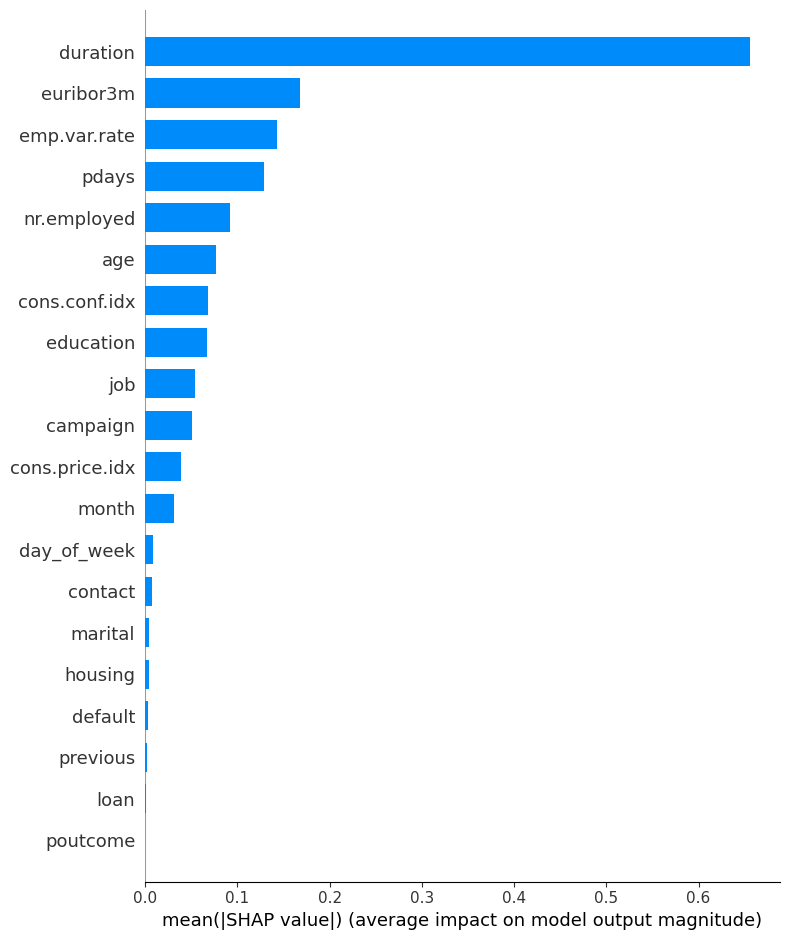

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


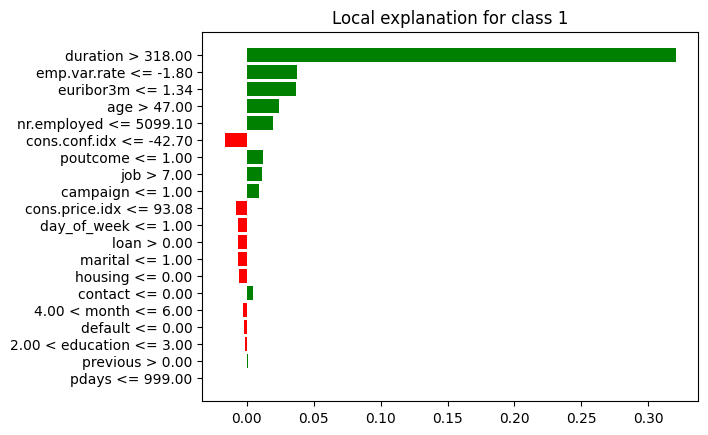

In [ ]:
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import numpy as np
# Train the Logistic Regression model with different hyperparameters
model_default = LogisticRegression(solver='saga', max_iter=1000)  # Specify 'saga' solver and increase max_iter
model_default.fit(X_train, y_train)

# SHAP Explainer
explainer = shap.Explainer(model_default, X_train)
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# LIME Explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode="classification", training_labels=y_train, feature_names=X_train.columns)

# Explanation for a single instance
instance_idx = 0  # Choose an index of the instance you want to explain
instance = X_test.iloc[instance_idx]
exp = lime_explainer.explain_instance(instance.values, model_default.predict_proba, num_features=len(X_train.columns))

# Visualization of the explanation
exp.show_in_notebook(show_table=True, show_all=False)

# Comparison of SHAP and LIME explanations for the same instance
shap.initjs()
instance_array = instance.values.reshape(1, -1)
#shap.force_plot(explainer.expected_value, shap_values[instance_idx][0], instance)
#shap.force_plot(explainer.expected_value, shap_values[instance_idx][0], instance)
shap_values_instance = shap_values[instance_idx]
expected_value_instance = explainer.expected_value
shap_explanation = shap.Explanation(values=shap_values_instance, base_values=expected_value_instance)
shap.force_plot(shap_explanation.base_values, shap_explanation.values, instance)


# Visualize LIME explanation
exp.as_pyplot_figure()
plt.show()



# Visualize LIME explanation
#exp.as_pyplot_figure()
#plt.show()


In [ ]:
print(type(explainer.expected_value))
print(type(shap_values))
print(type(shap_values[instance_idx]))
print(type(instance))

print(explainer.expected_value.shape)
print(shap_values.shape)
print(shap_values[instance_idx].shape)
print(instance.shape)


<class 'numpy.float64'>
<class 'shap._explanation.Explanation'>
<class 'shap._explanation.Explanation'>
<class 'pandas.core.series.Series'>
()
(8238, 20)
(20,)
(20,)
